In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
stores = pd.read_csv('C:\Analytix\DSP Class 4 & 5 files\DSP Class 4 & 5 files\DataSets\stores.csv')
stores.head()

,StoreCode,StoreName,StoreType,Location,OperatingCost,Staff_Cnt,TotalSales,Total_Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,OnlinePresence,Tenure,StoreSegment
0,STR101,Electronics Zone,Electronincs,Delhi,21.0,60,160.0,110,3.90,2.620,16.46,0,1,4,4
1,STR102,Apparel Zone,Apparel,Delhi,21.0,60,160.0,110,3.90,2.875,17.02,0,1,4,4
2,STR103,Super Bazar,Super Market,Delhi,22.8,40,108.0,93,3.85,2.320,18.61,1,1,4,1
3,STR104,Super Market,Super Market,Delhi,21.4,60,258.0,110,3.08,3.215,19.44,1,0,3,1
4,STR105,Central Store,Super Market,Delhi,18.7,80,360.0,175,3.15,3.440,17.02,0,0,3,2


# Histogram

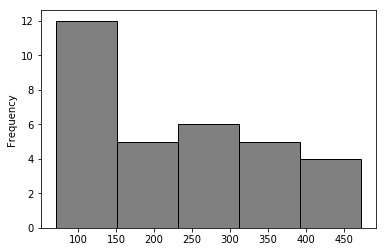

In [3]:
#Using pandas dataframe attributes
stores.TotalSales.plot(kind='hist',
                       bins=5,
                      edgecolor='black',
                      color='grey')

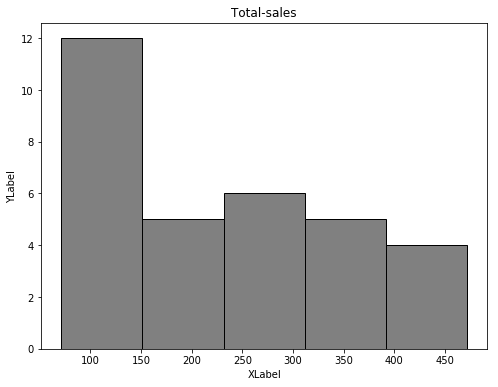

In [4]:
stores.TotalSales.plot.hist(bins=5, color='grey', edgecolor='black', figsize=(8,6))
plt.xlabel("XLabel")
plt.ylabel("YLabel")
plt.title('Total-sales')
plt.show()

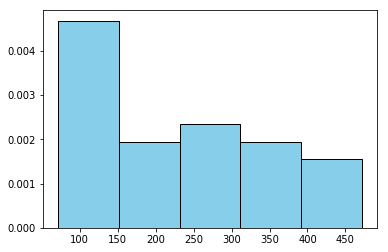

In [5]:
#Using plt
plt.hist(stores.TotalSales, bins=5, color='skyblue', edgecolor='black', density=True)
plt.show()

C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


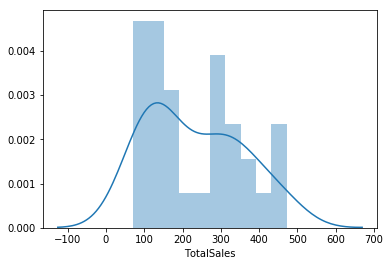

In [6]:
#Seaborn
sns.distplot(stores.TotalSales, bins=10)

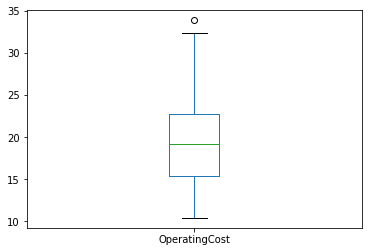

In [7]:
#BoxPlots
stores.OperatingCost.plot(kind="box")
plt.show()

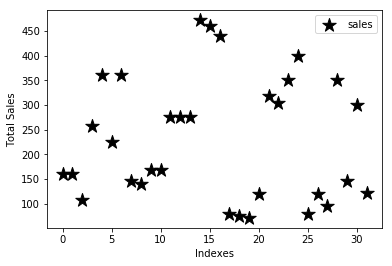

In [8]:
#Scatter plots

#Method1
plt.scatter(x=list(range(0,32)),y=stores.TotalSales, c="black", s=200, marker="*", label='sales')
plt.xlabel("Indexes")
plt.ylabel('Total Sales')
plt.legend()
plt.show()

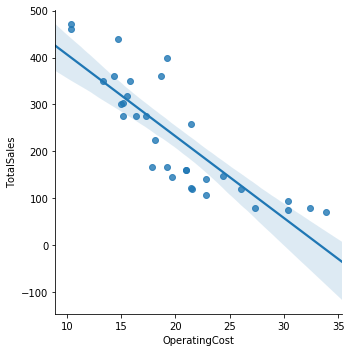

In [9]:
#seaborn doesnt accept panda series
sns.lmplot(x='OperatingCost', y='TotalSales', data=stores)
plt.show()

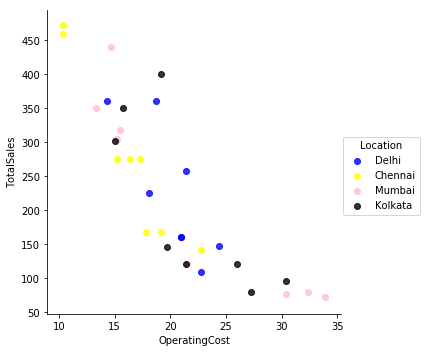

In [10]:
sns.lmplot(x='OperatingCost', y='TotalSales', data=stores, fit_reg=False,hue="Location", palette=['blue','yellow', 'pink', 'black'])
plt.xlabel("OperatingCost")
plt.ylabel('TotalSales')
plt.show()

In [11]:
#Barplots
stores.StoreType.value_counts()

Apparel         12
Super Market    12
Electronincs     8
Name: StoreType, dtype: int64

In [12]:
f1 = stores.groupby(by='StoreType')[['StoreType']].count().add_prefix('CountOf_')
f1

,CountOf_StoreType
StoreType,
Apparel,12
Electronincs,8
Super Market,12


In [13]:
f2 = stores.groupby(by='StoreType')[['StoreType']].count().add_prefix('CountOf_').reset_index()
f2

,StoreType,CountOf_StoreType
0,Apparel,12
1,Electronincs,8
2,Super Market,12


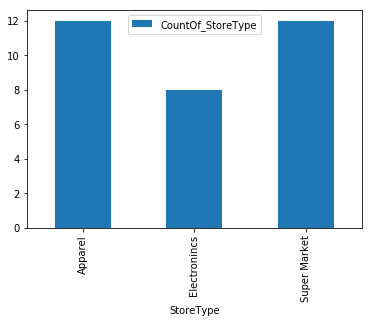

In [14]:
f1.plot(kind='bar')
plt.show()

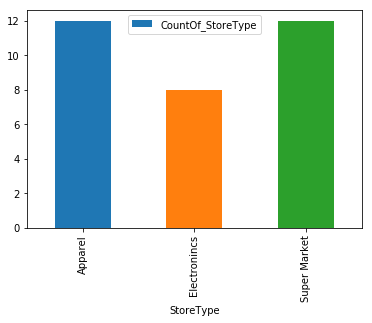

In [15]:
f2.plot(kind='bar',x='StoreType', y='CountOf_StoreType')
plt.show()

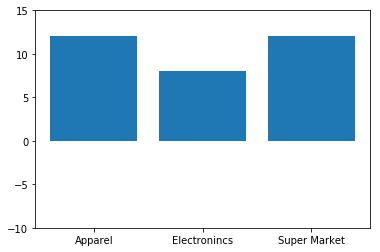

In [20]:
#Using plyplot
plt.bar(x=f2.StoreType, height=f2.CountOf_StoreType)
plt.ylim(-10,15)
plt.show()

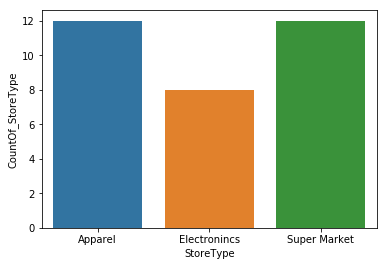

In [21]:
#using seaborn
sns.barplot(x="StoreType", y="CountOf_StoreType",data=f2)
plt.show()

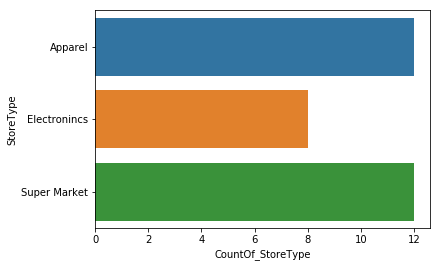

In [23]:
sns.barplot(y="StoreType", x="CountOf_StoreType",data=f2,orient="h")
plt.show()

In [25]:
r2 = stores.groupby(by=['Location'])[['TotalSales']].sum().add_prefix('SumOf_').reset_index()
r1 = stores.groupby(by=['Location'])[['TotalSales']].sum().add_prefix('SumOf_')

,SumOf_TotalSales
Location,
Chennai,2235.4
Delhi,1777.7
Kolkata,1612.4
Mumbai,1757.6


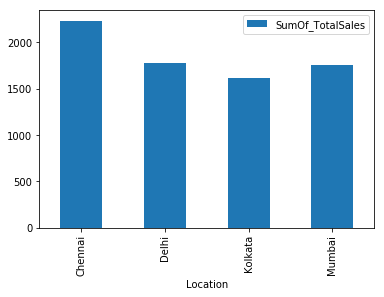

In [26]:
r1.plot(kind="bar")

<BarContainer object of 4 artists>

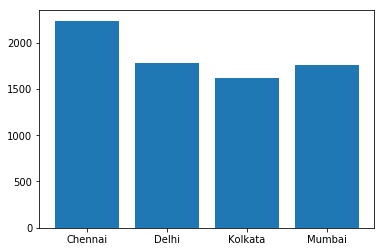

In [27]:
plt.bar(x=r2.Location, height=r2.SumOf_TotalSales)

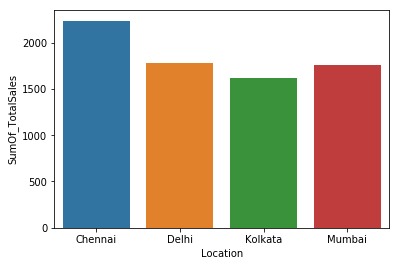

In [28]:
sns.barplot(y="SumOf_TotalSales",x="Location",data=r2)

In [34]:
GrandTotalSales = r1.SumOf_TotalSales.sum()
r1['pctSales'] = round(r1.SumOf_TotalSales/GrandTotalSales * 100,2)
r1.drop(columns=['SumOf_TotalSales'])

,pctSales
Location,
Chennai,30.28
Delhi,24.08
Kolkata,21.84
Mumbai,23.81


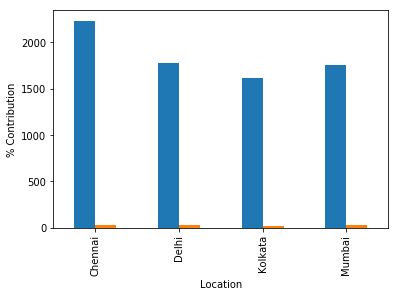

In [32]:
r1.plot(kind="bar", legend=False)
plt.ylabel('% Contribution')
plt.show()

In [37]:
r2 = r1.reset_index()

<BarContainer object of 4 artists>

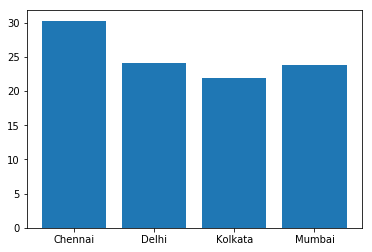

In [38]:
plt.bar(x=r2.Location, height=r2.pctSales)

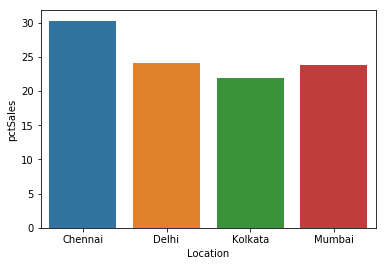

In [39]:
sns.barplot(x="Location",y="pctSales",data=r2)

In [53]:
r3 = stores.groupby(by=['Location','StoreType'])[['OperatingCost']].mean().add_prefix('MeanOf_')
r4 = stores.groupby(by=['Location','StoreType'])[['OperatingCost']].mean().add_prefix('MeanOf_').reset_index()

In [54]:
r3

MeanOf_OperatingCost
Location StoreType                         
Chennai  Apparel                  14.933333
         Electronincs             16.600000
         Super Market             17.166667
Delhi    Apparel                  17.800000
         Electronincs             22.700000
         Super Market             20.966667
Kolkata  Apparel                  20.666667
         Electronincs             20.300000
         Super Market             24.066667
Mumbai   Apparel                  21.033333
         Electronincs             14.000000
         Super Market             28.600000

In [56]:
r4_wide = r4.pivot(index='Location', columns='StoreType', values='MeanOf_OperatingCost')
r4_wide

StoreType,Apparel,Electronincs,Super Market
Location,,,
Chennai,14.933333,16.6,17.166667
Delhi,17.800000,22.7,20.966667
Kolkata,20.666667,20.3,24.066667
Mumbai,21.033333,14.0,28.600000


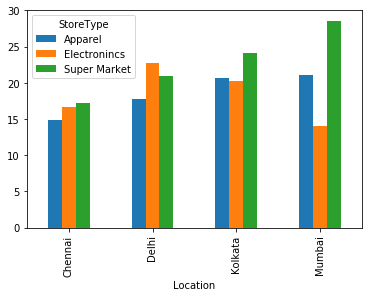

In [57]:
#Dodged bar
r4_wide.plot(kind='bar')

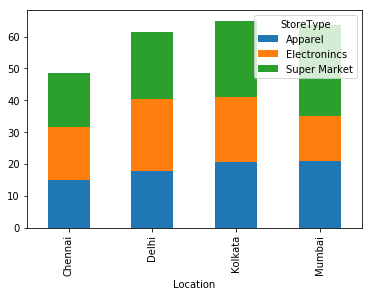

In [58]:
#Composition Chart
r4_wide.plot(kind='bar',stacked=True)

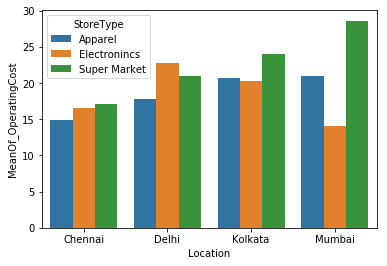

In [62]:
sns.barplot(x='Location',y='MeanOf_OperatingCost',data=r4,hue='StoreType')

Seaborn cannot do stack bars.It shows bars one behind other not on top of each other.

In [69]:
Result_r4_long = pd.melt(r4, id_vars='Location',value_name='Values', var_name='Metrics')
Result_r4_long

,Location,Metrics,Values
0,Chennai,StoreType,Apparel
1,Chennai,StoreType,Electronincs
2,Chennai,StoreType,Super Market
3,Delhi,StoreType,Apparel
4,Delhi,StoreType,Electronincs
5,Delhi,StoreType,Super Market
6,Kolkata,StoreType,Apparel
7,Kolkata,StoreType,Electronincs
8,Kolkata,StoreType,Super Market
9,Mumbai,StoreType,Apparel


In [73]:
_temp = stores.groupby(['Location'])
a = _temp[['TotalSales']].sum().add_prefix('SumOf_')
b = _temp[['OperatingCost']].mean().add_prefix('MeanOf_')
Result = pd.concat([a,b], axis=1).reset_index()
Result

,Location,SumOf_TotalSales,MeanOf_OperatingCost
0,Chennai,2235.4,16.1875
1,Delhi,1777.7,20.2125
2,Kolkata,1612.4,21.8500
3,Mumbai,1757.6,22.1125


In [74]:
Result_r4_long = pd.melt(Result, id_vars='Location',value_name='Values', var_name='Metrics')
Result_r4_long

,Location,Metrics,Values
0,Chennai,SumOf_TotalSales,2235.4000
1,Delhi,SumOf_TotalSales,1777.7000
2,Kolkata,SumOf_TotalSales,1612.4000
3,Mumbai,SumOf_TotalSales,1757.6000
4,Chennai,MeanOf_OperatingCost,16.1875
5,Delhi,MeanOf_OperatingCost,20.2125
6,Kolkata,MeanOf_OperatingCost,21.8500
7,Mumbai,MeanOf_OperatingCost,22.1125


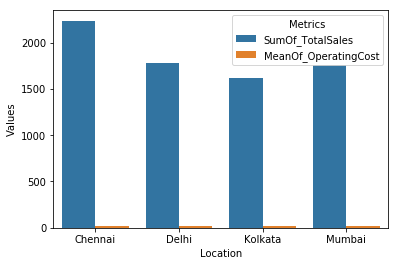

In [75]:
sns.barplot(x='Location',y='Values',data=Result_r4_long,hue='Metrics')
plt.show()

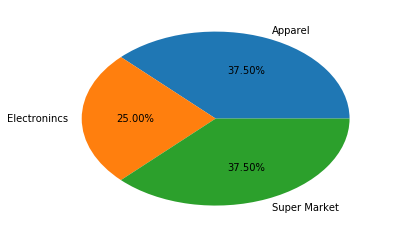

In [80]:
f1.plot(kind="pie",subplots=True,legend=False,autopct="%.2f%%")
plt.ylabel("")
plt.show()

In [85]:
r4_pivot = r4.pivot(index='Location',columns='StoreType', values='MeanOf_OperatingCost')
r4_pivot

StoreType,Apparel,Electronincs,Super Market
Location,,,
Chennai,14.933333,16.6,17.166667
Delhi,17.800000,22.7,20.966667
Kolkata,20.666667,20.3,24.066667
Mumbai,21.033333,14.0,28.600000


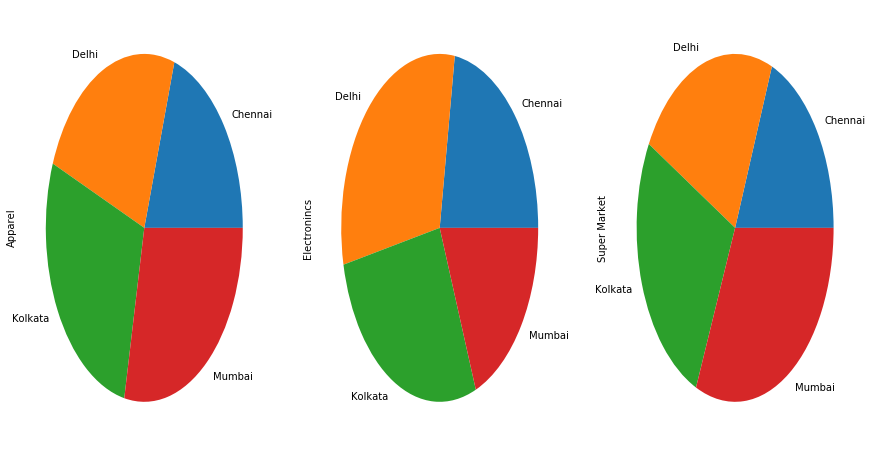

In [91]:
r4_pivot.plot(kind="pie",subplots=True, legend=False, figsize=(15,8))
plt.savefig("PieChart.png")
plt.show()

<Figure size 432x288 with 0 Axes>